# Challenge 1: Numerical data are not always CSVs

It is your first day of work in a new earthquake hazard program. You are a data analyst, your job is to process data and make sense of it by using existing tools and technologies.

Unfortunately, today the data is not shaped the way you expected. 


These files contain SS and S1 ground motion data (corresponding to the 0.2 second and 1.0 second periods respectively). 
The basic format of the binary file is as follows: (recnum, latitude, longitude, numvals, Ss, S1).

    
Where:
    
    recnum : 4-Byte Integer Just an index identifying the record number in the file.
    
    latitude : 4-Byte Floating Point Number Specifies the geographic latitude of the location.
    
    longitude : 4-Byte Floating Point Number Specifies the geographic longitude of the location.
    
    numvals : 2-Byte Short Integer Specifies the number of valid values in this record. 

Generally for this file type there are always two (2) values. Names, the SS and S1.

    SS : 4-Byte Floating Point Number The value of the short period (0.2 second) ground motion at this location.
    
    S1 : 4-Byte Floating Point Number The value of the 1.0 second ground motion at this location.

In [2]:
import struct
import os
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
f = open("1997-AK-MCE-R1a (1).rnd", 'rb')
SIZE = os.path.getsize("1997-AK-MCE-R1a (1).rnd")

In [45]:
# keep reading 24 and do a for loop for values that you seek 
# Inspiration from: https://stackoverflow.com/questions/37623419/extract-specific-bytes-from-a-binary-file-in-python
end = []
for i in range(0, int(SIZE/24)):
    f.seek(24*i)
    data = f.read(24)
    result = struct.unpack('iffhff', data)
    end.append(list(result))

df = pd.DataFrame(end, columns=['recnum', 'latitude', 'longitude', 'numvals', 'SS', 'S1'])

In [46]:
print("SS data")
print(df['SS'].describe())

print("S1 data")
df['S1'].describe()

SS data
count    1.323820e+05
mean     3.985329e+34
std      1.757118e+37
min     -3.379645e+38
25%     -2.727600e-04
50%      2.260014e-41
75%      1.967029e-04
max      3.379633e+38
Name: SS, dtype: float64
S1 data


count    1.328230e+05
mean     2.329978e-41
std      4.143407e-43
min      0.000000e+00
25%      2.312283e-41
50%      2.335124e-41
75%      2.355723e-41
max      2.410934e-41
Name: S1, dtype: float64

In [47]:
# get rid of NAs
df.dropna(inplace=True)
# df.plot(x="longitude", y="latitude", kind="scatter", c="Normalized_SS",
#         colormap="YlOrRd")

In [48]:
# remove 0 longitude and latitude as it is possible an artefact
df = df[df['longitude'] != 0]
# df.plot(x="longitude", y="latitude", kind="scatter", c="Normalized_SS",
#         colormap="YlOrRd")

<AxesSubplot:>

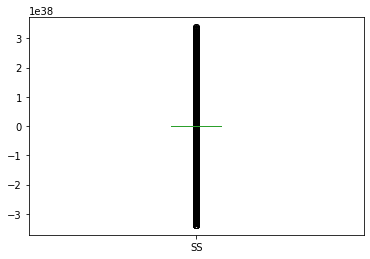

In [49]:
# check for outliers using boxplot before min-max normalization
df['SS'].plot(kind='box') # SS is uniformly distributed, min-max normalization can be done

<AxesSubplot:>

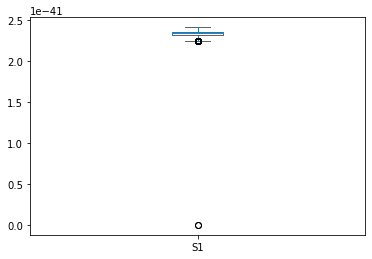

In [50]:
df['S1'].plot(kind='box') # 0s are outliers in S1 data

<AxesSubplot:>

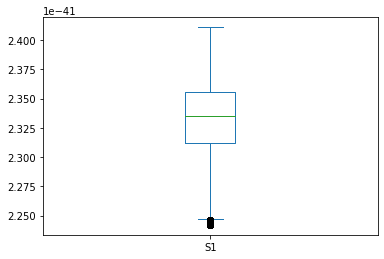

In [51]:
# remove 0 for S1 and create a df for S1
df_S1 = df[df['S1'] != 0]

df_S1['S1'].plot(kind='box') # 0s are outliers in S1 data

The file documents seismic activity mostly near Alaska.

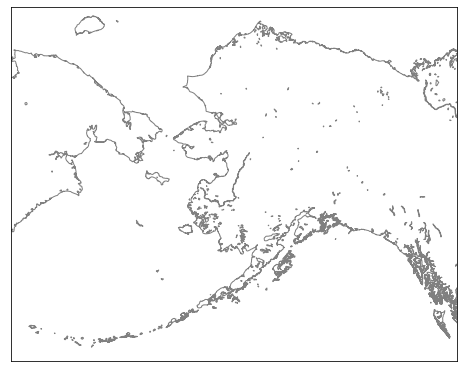

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lo0 = df["longitude"].mean() 
la0 = df["latitude"].mean() 
lo1 = df["longitude"].min() 
la1 = df["latitude"].min() 
lo2 = df["longitude"].max() 
la2 = df["latitude"].max() 

fig = plt.figure(figsize=(8, 8))

m = Basemap(projection='merc',llcrnrlat=la1,urcrnrlat=la2,\
            llcrnrlon=lo1,urcrnrlon=lo2,resolution='h')

m.drawcoastlines(color='gray')
m.fillcontinents(color='w')


# x = list(df["latitude"])
# y = list(df["longitude"])
# m.plot(x, y, 'bo', markersize=18)
# x,y = m(lons, lats)

# for lat, long in zip(x, y):
#     m.plot(lat, long, marker = 'o', c='r', markersize=1, alpha=0.8, latlon=False,zorder=6)


m.scatter(list(df["latitude"]), list(df["longitude"]), latlon=True, cmap='Reds', alpha=0.5)

To visualize SS and S1 data, I subset 75% percentile of data, because the greatest values are more likely to be important for the project. SS data seems to be evenly distributed over Alaska while S1 seems to be clustered near the edge of North American plate and Pacific plate. I would make a preliminary prediction that S1 data is more useful in predicting earthquakes than SS data.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

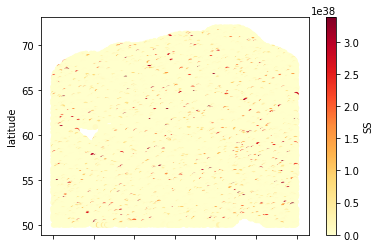

In [54]:
# SS 75% percentile
df[df["SS"] > 1.967029e-04].plot(x="longitude", y="latitude", kind="scatter", c="SS",
        colormap="YlOrRd")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

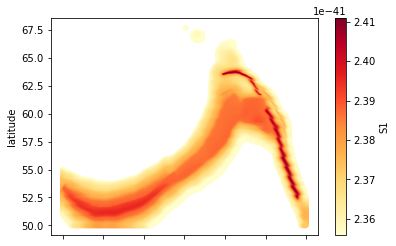

In [55]:
# S1 75% percentile
df[df["S1"] > 2.355723e-41].plot(x="longitude", y="latitude", kind="scatter", c="S1",
        colormap="YlOrRd")

In [56]:
f.close()